# Credit Card Customer Segmentation

The dataset contains information about the company’s clients and this task is to help segment them into different groups in order to apply different business strategies for each type of customer.

For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.

The dataset as being cleaned and the task is focused on building the best possible model to segment the data, and this model used is the K-means algorithm.

The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different.

In order to use the algorithm properly and achieve all the goals that the company has set, this task will go through the following steps:

- Analyze the dataset;
- Prepare the data for modeling;
- Find an appropriate number of clusters;
- Segment the data;
- Interpret and explain the results.

Here's the data dictionary:

- customer_id: unique identifier for each customer.
- age: customer age in years.
- gender: customer gender (M or F).
- dependent_count: number of dependents of each customer.
- education_level: level of education ("High School", "Graduate", etc.).
- marital_status: marital status ("Single", "Married", etc.).
- estimated_income: the estimated income for the customer projected by the data science team.
- months_on_book: time as a customer in months.
- total_relationship_count: number of times the customer contacted the company.
- months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.
- credit_limit: customer's credit limit.
- total_trans_amount: the overall amount of money spent on the card by the customer.
- total_trans_count: the overall number of times the customer used the card.
- avg_utilization_ratio: daily average utilization ratio. 0

In [169]:
# Importing Libraries to be used

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
# Load the dataset

df = pd.read_csv('customer_segmentation.csv')
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [171]:
df.shape # How big is the dataset? How many columns does it have? 

(10127, 14)

In [172]:
df.columns # Do we see any particular column that doesn't use the analysis?

Index(['customer_id', 'age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')

In [173]:
df.dtypes 

# What's the type of data contained in each column? Are there many categorical variables?

customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object

In [174]:
# Are there any missing values?

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

customer_id - 0.0%
age - 0.0%
gender - 0.0%
dependent_count - 0.0%
education_level - 0.0%
marital_status - 0.0%
estimated_income - 0.0%
months_on_book - 0.0%
total_relationship_count - 0.0%
months_inactive_12_mon - 0.0%
credit_limit - 0.0%
total_trans_amount - 0.0%
total_trans_count - 0.0%
avg_utilization_ratio - 0.0%


In [175]:
# WHat's the relationship between the columns

df.corr()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
customer_id,1.000000,0.007613,0.006772,0.015787,0.134588,0.006907,0.005729,0.005708,-0.019692,-0.002961,0.000266
age,0.007613,1.000000,-0.122254,0.032922,0.788912,-0.010931,0.054361,0.002476,-0.046446,-0.067097,0.007114
dependent_count,0.006772,-0.122254,1.000000,0.051620,-0.103062,-0.039076,-0.010768,0.068065,0.025046,0.049912,-0.037135
estimated_income,0.015787,0.032922,0.051620,1.000000,0.027628,-0.007181,-0.002703,0.515863,0.015861,-0.039988,-0.277532
months_on_book,0.134588,0.788912,-0.103062,0.027628,1.000000,-0.009203,0.074164,0.007507,-0.038591,-0.049819,-0.007541
total_relationship_count,0.006907,-0.010931,-0.039076,-0.007181,-0.009203,1.000000,-0.003675,-0.071386,-0.347229,-0.241891,0.067663
months_inactive_12_mon,0.005729,0.054361,-0.010768,-0.002703,0.074164,-0.003675,1.000000,-0.020394,-0.036982,-0.042787,-0.007503
credit_limit,0.005708,0.002476,0.068065,0.515863,0.007507,-0.071386,-0.020394,1.000000,0.171730,0.075927,-0.482965
total_trans_amount,-0.019692,-0.046446,0.025046,0.015861,-0.038591,-0.347229,-0.036982,0.171730,1.000000,0.807192,-0.083034
total_trans_count,-0.002961,-0.067097,0.049912,-0.039988,-0.049819,-0.241891,-0.042787,0.075927,0.807192,1.000000,0.002838


/tmp/ipykernel_388/581185571.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[num_col].hist(ax=ax)


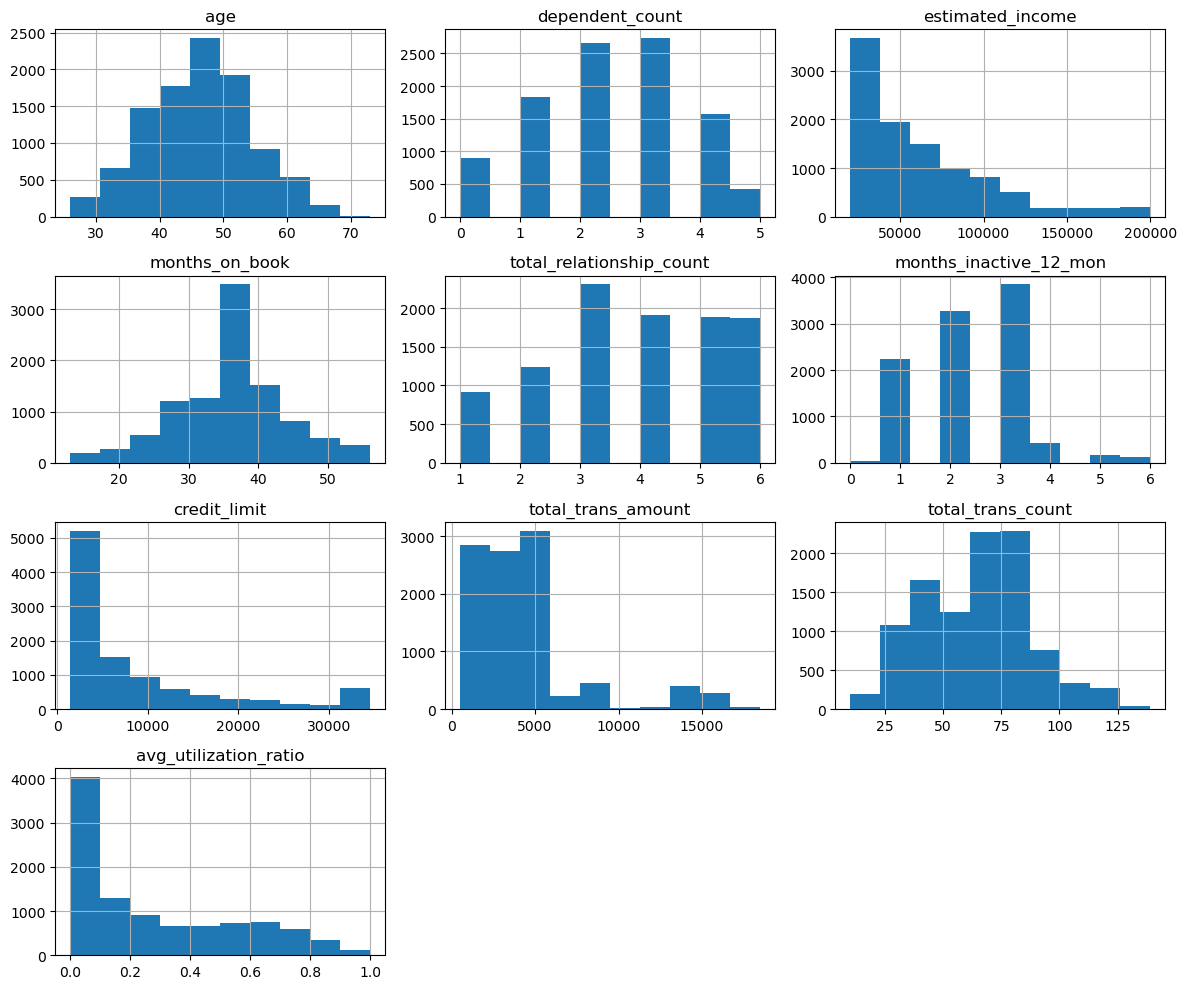

In [176]:
# Plot the distribution of the numeric column with exception to the customerID
num_col = ['age', 'dependent_count', 'estimated_income', 'months_on_book', 
           'total_relationship_count', 'months_inactive_12_mon', 'credit_limit', 
           'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']
fig, ax = plt.subplots(figsize=(12, 10))
df[num_col].hist(ax=ax)
plt.tight_layout()
plt.show()

In [177]:
dfc = df.copy()

# Replace the values in the gender column with 1 for "M" and 0 for "F".
dfc['gender'] = dfc['gender'].apply(lambda x: 1 if x == 'M' else 0)

# Replace the values in the education_level column in the order (0,1,2,3,4,5)
dfc['education_level'] = dfc['education_level'].map({'Uneducated': 0, 'High School': 1,
                                                     'College': 2, 'Graduate': 3,
                                                     'Post-Graduate': 4, 'Doctorate': 5
                                                    })

Unfortunately, we can't do the same for this marital_status column as for the last categorical column. As we can see, unlike the education_level column, there is no level of magnitude between "Single", "Married" or "Divorced", for example. We can't say that any of them is higher or better than the others, which means we can't rank these categories objectively.

Therefore, we'll use one-hot-encoding to create dummy variables from the marital_status column.

In [178]:
dfc = pd.get_dummies(data= dfc, columns=['marital_status'], drop_first=True) 

In [179]:
dfc.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


In [180]:
dfc.shape

(10127, 16)

In [181]:
# Remove the customer_id column from the dataframe

dfc.drop('customer_id', axis=1, inplace=True)


The dataset have different scaled data across the DataFrame containing columns with numbers in the range of 1 to 5, dozens and hundreds of thousands. we need to transform the data so it's all on the same scale

In [182]:
# Standardising the dataset to scale the data accross all dataframe

scale = StandardScaler()
scaled_dfc = scale.fit_transform(dfc)

scaled_dfc

array([[-0.16540558,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  1.07733799,
        -0.79850685, -0.28260887]])

In [183]:
scaled_x = pd.DataFrame(scaled_dfc)

In [184]:
scaled_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


In the choice of the number of clusters to use. We'll run the k-means algorithm considering a range from 1 to 10 possible Ks and store the interia_ results and plot the elbow curve that will help us find a final K.

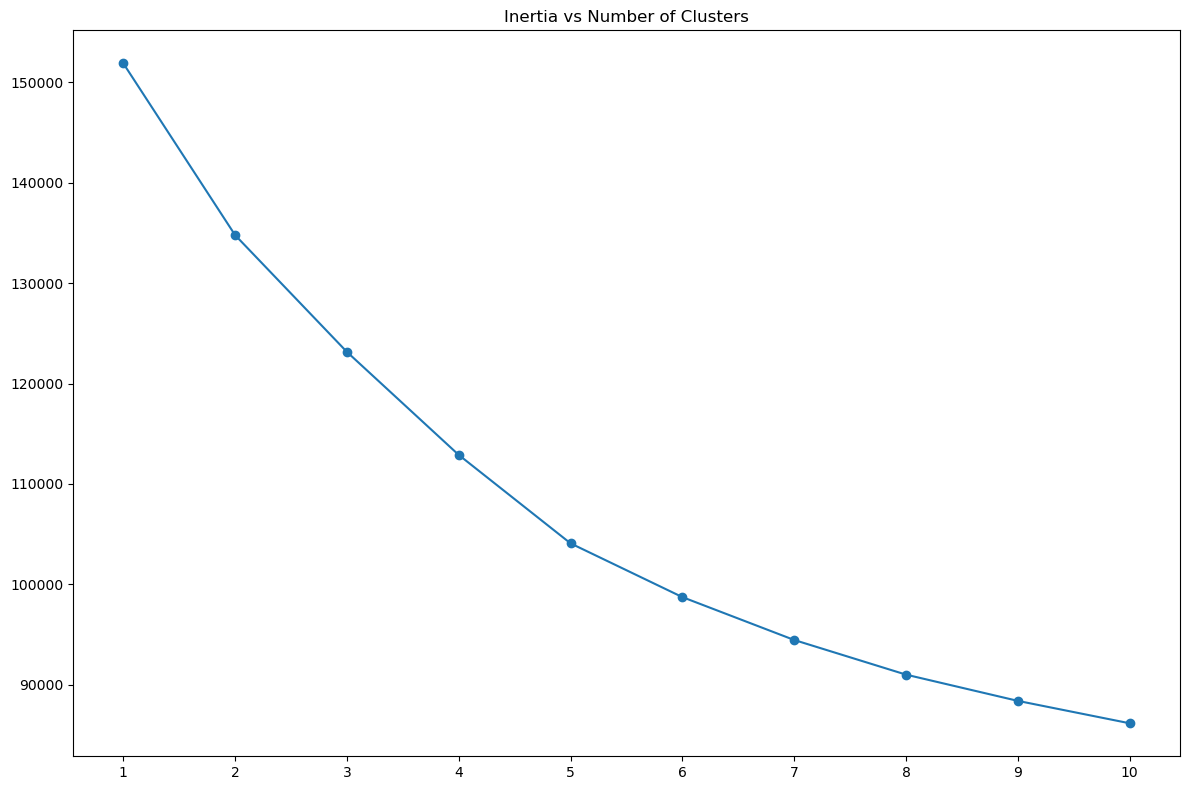

In [185]:
inertias = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    clusters = model.fit_predict(scaled_x)
    inertias.append(model.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')
plt.tight_layout()
plt.show()

In [186]:
# It looks like the rate of decreasing of the inertia slows down between 5 and 7 clusters. We'll use 6 clusters to move on.
# From the elbow curve there's a choice of selecting 6 as the number of clusters to use

model = KMeans(n_clusters=6)
clusters = model.fit_predict(scaled_dfc)

clusters

array([5, 3, 5, ..., 2, 1, 2], dtype=int32)

In [187]:
# Inserting the cluster back to the original dataframe
df['Cluster'] = clusters + 1
df['Cluster'].value_counts()

3    2815
4    2448
6    1781
1    1444
5     910
2     729
Name: Cluster, dtype: int64

In [188]:
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Cluster
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,6
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,4
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,6
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,2
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,3


Checking out the average value of each numerical variable per cluster with the aid of a bar plot

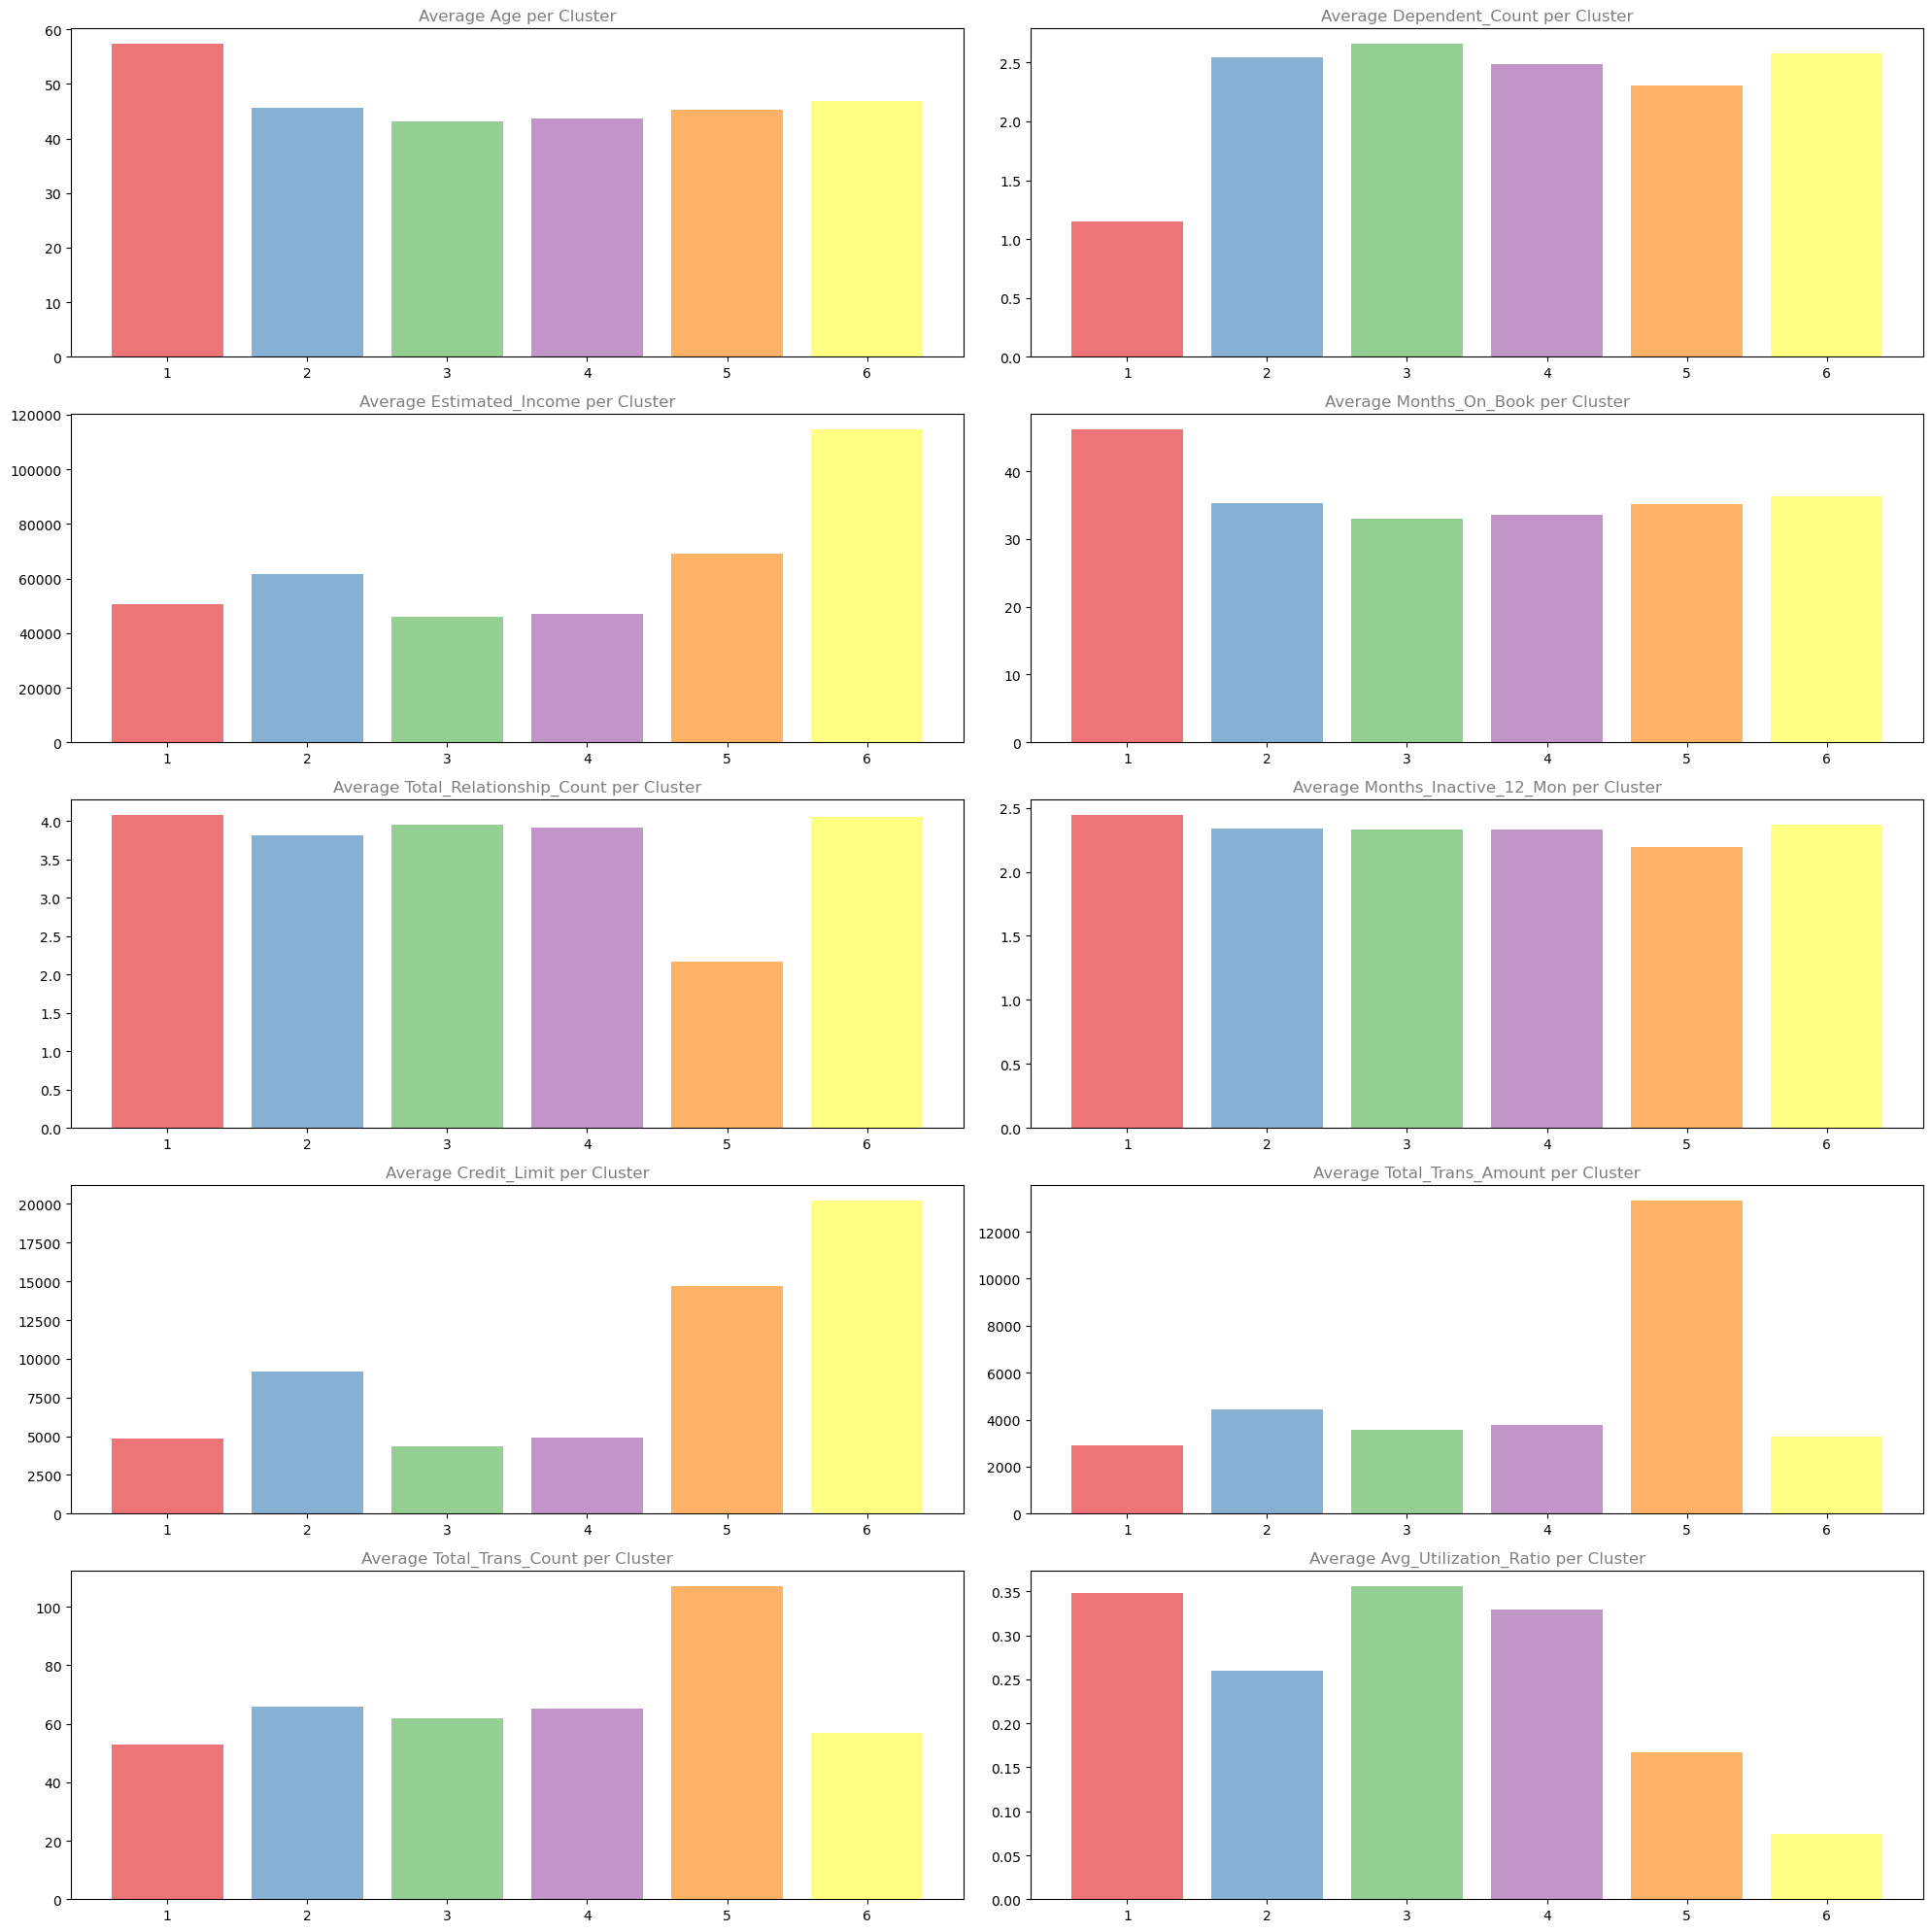

In [189]:
numeric_columns = df.select_dtypes(include=np.number).drop(['customer_id', 'Cluster'], 
                                                           axis=1).columns

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = df.groupby('Cluster')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()
     

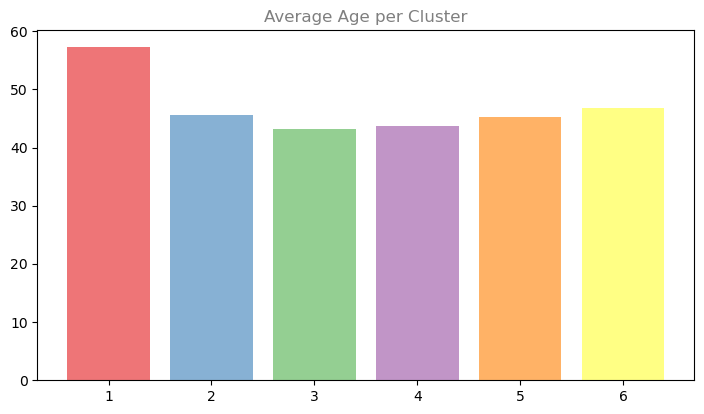

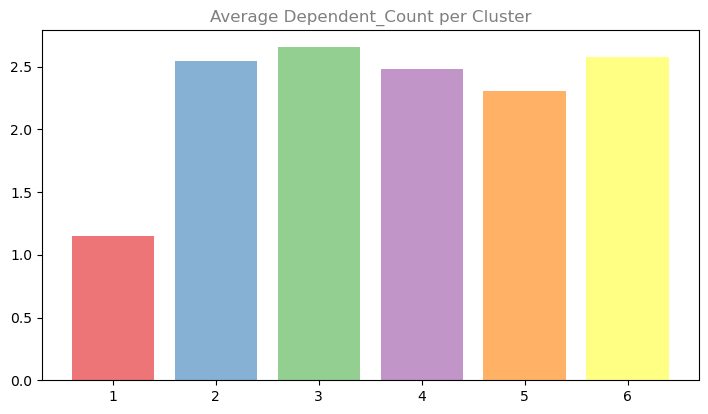

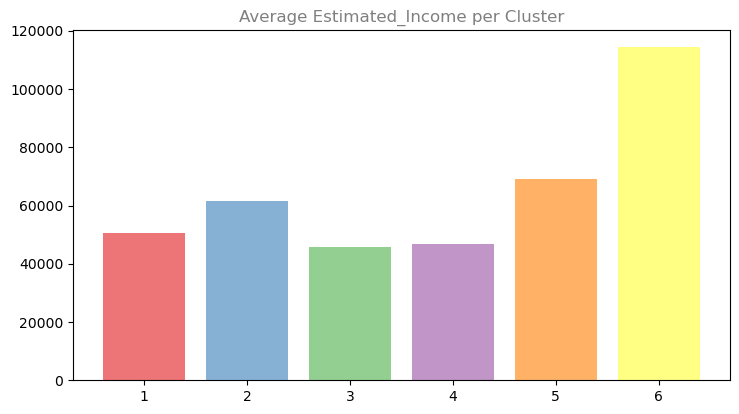

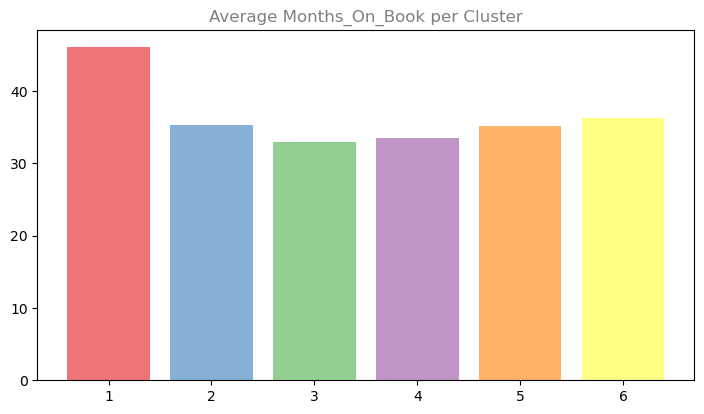

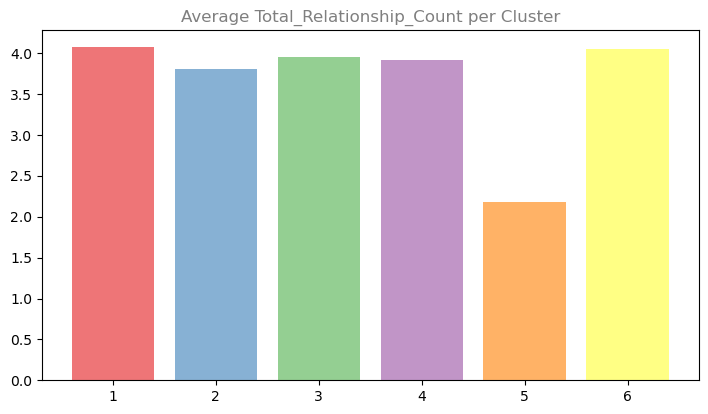

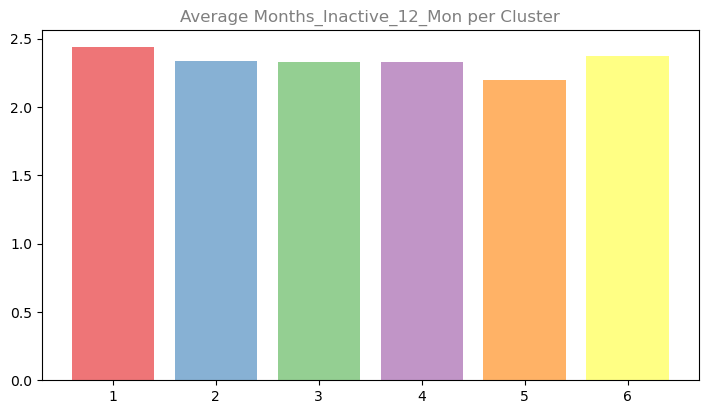

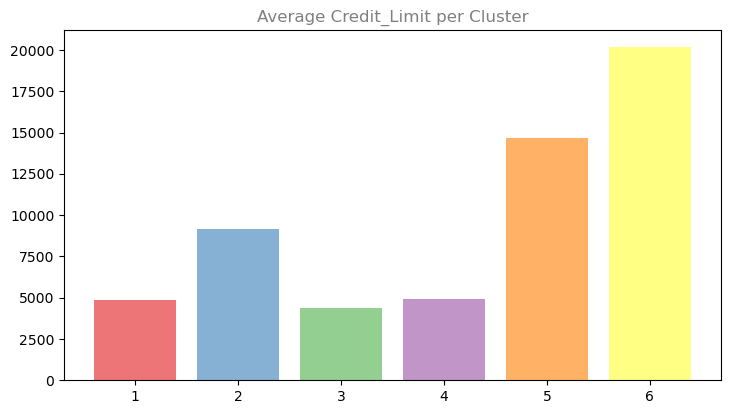

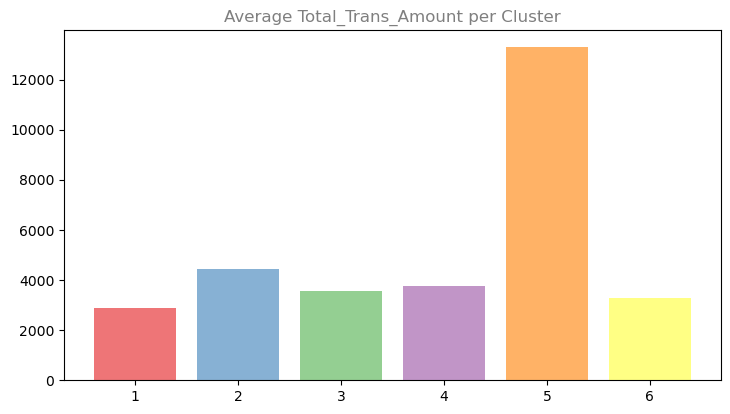

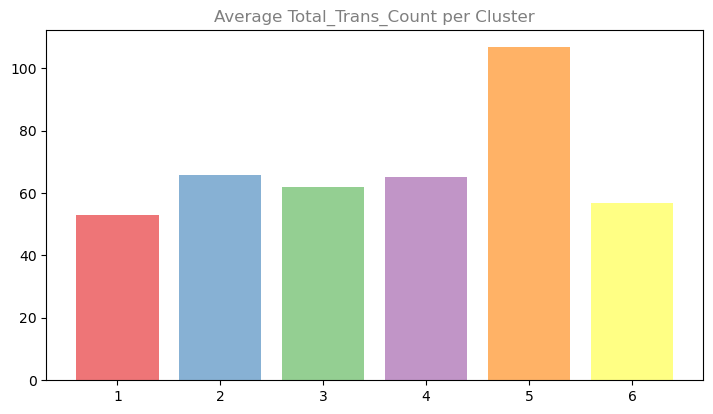

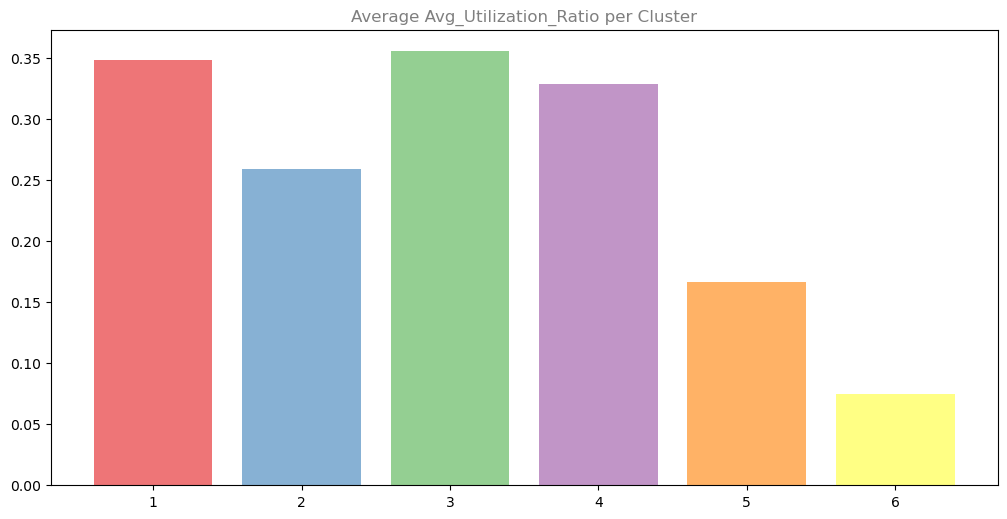

In [190]:
num_col = ['age', 'dependent_count', 'estimated_income', 'months_on_book', 
           'total_relationship_count', 'months_inactive_12_mon', 'credit_limit', 
           'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']



for i, col in enumerate(num_col):
    avg = df.groupby('Cluster')[col].mean()
    ax = plt.figure(figsize=(100,10)).add_subplot(2, 10, i+1)
    ax.bar(avg.index, avg, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {col.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

In [191]:
corr = abs(df.corr()) # Select the variable with high correlation against the cluster and plotting it with the scatter plot
high_corr = corr['Cluster'].sort_values(ascending=False)[1:9].index

In [192]:
high_corr

Index(['credit_limit', 'estimated_income', 'avg_utilization_ratio', 'age',
       'months_on_book', 'total_trans_amount', 'dependent_count',
       'total_trans_count'],
      dtype='object')

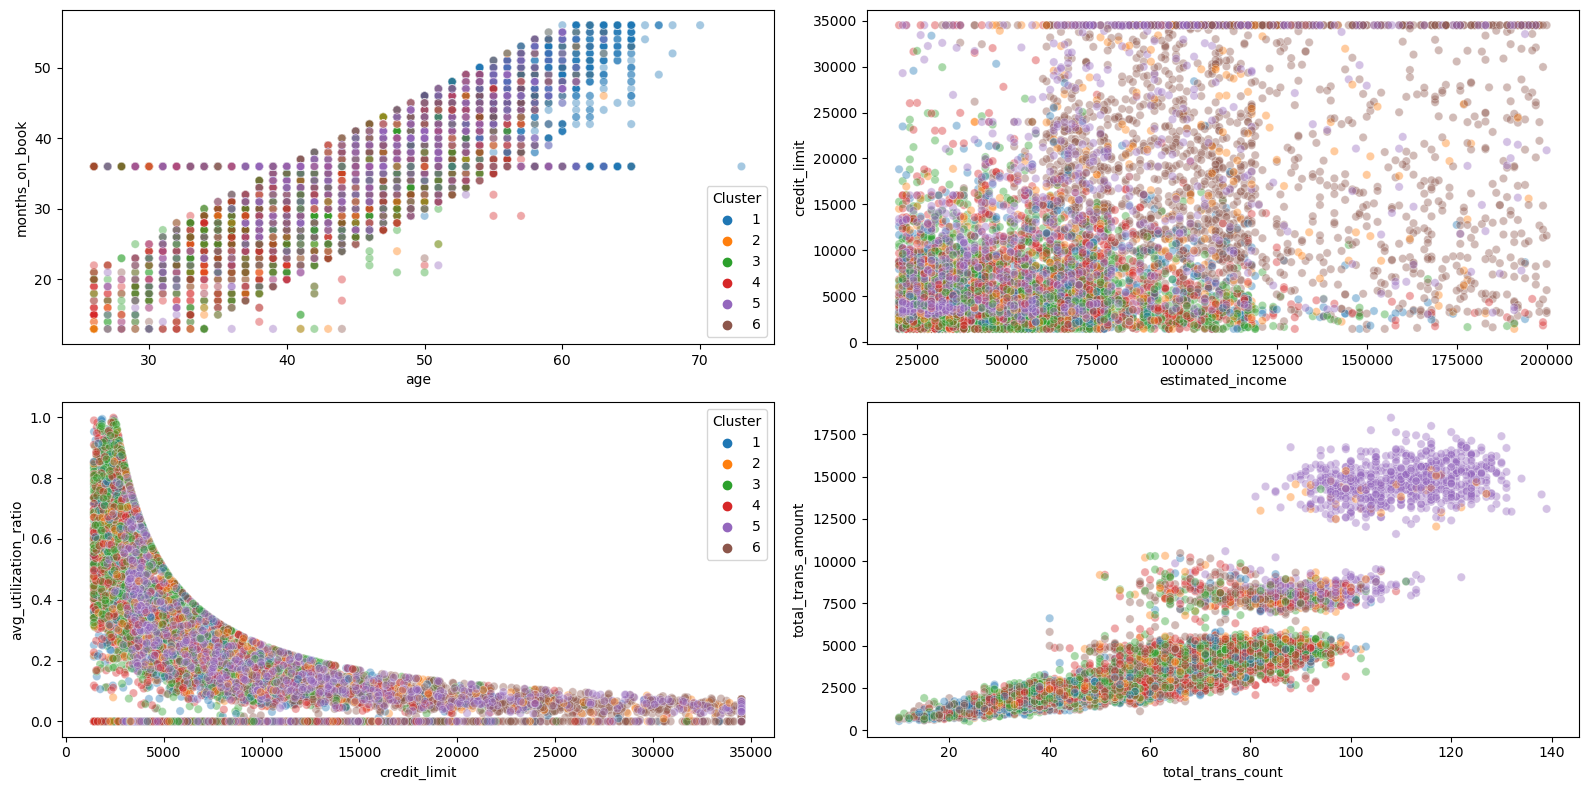

In [193]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='Cluster', data= df, 
                palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='Cluster', data= df, 
                palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='Cluster', data= df, palette='tab10', 
                alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='Cluster', data= df, palette='tab10', 
                alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

From the scatter plot above, we can make the following conclusion
- Cluster 1 has the highest amount of money transitioned 
- Cluster 2 has the lowest credit limit and estimated income and the highest utilization rate. 
- Cluster 4 has the highest credit limit. 
- Older clients are grouped in Cluster 5.

With the categorical variables, using the bar distribution to plot the percentual distribution of each variable in each cluster. This will allow us to verify if a particular cluster is mostly composed of men, or of married people only, for example.

/tmp/ipykernel_388/2102235630.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/tmp/ipykernel_388/2102235630.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/tmp/ipykernel_388/2102235630.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


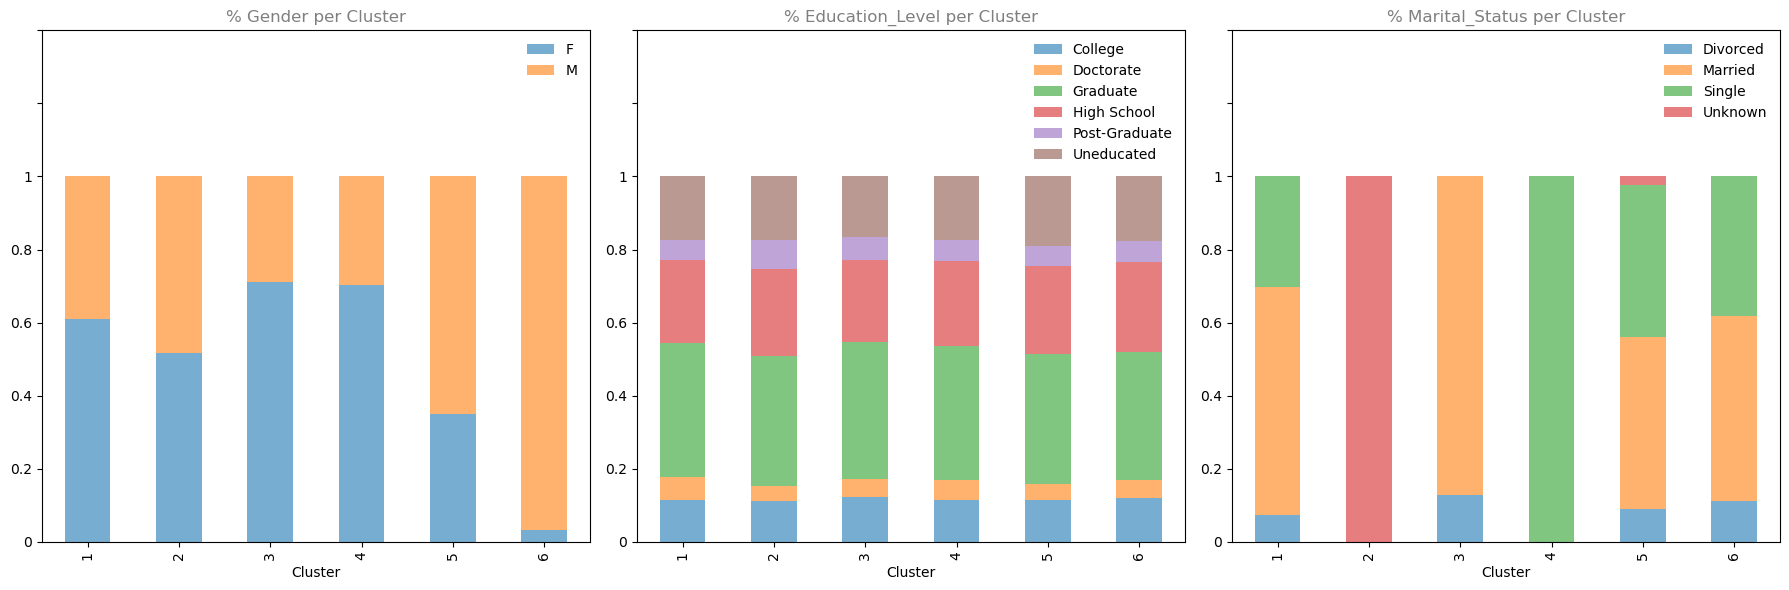

In [194]:
cat_col = df.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_col):
    plot_df = pd.crosstab(index=df['Cluster'], columns= df[col], values= df[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

Considering the categorical variables, we notice that the education level is well divided between clusters.

In other highlights, Cluster 2 is composed almost entirely of married people, while we don't know the marital status of anybody in Cluster 3. Cluster 4 is almost completely male and CLuster 6 is 100% made of single people.

## Conclusion
As demanded by the company, we now have listed the most important characteristics of each cluster. We could also some suggestions and insights into each one of them.

In the end, we have the list of customers with a cluster assigned to each one.

### Cluster 1
- Characteristics: Mostly men; high credit limit; high amount transitioned; high number of transactions; low utilization rate.

- Insight: People with high volume spent on the card, but do not use it on a daily basis. Could be incentivized to use it more often.

### Cluster 2
- Characteristics: Mostly women; mostly married; low estimated income; low credit limit; low amount transitioned; high utilization rate.

- Insight: Married people (majority women) with low income and limit but use the card too often. Could be given a bit more credit limit.

### Cluster 3
- Cluster 3: Gender well divided; low credit limit, high utilization rate; marital status 100% unknown; smaller cluster.

- Insight: Men and women with low credit limits but use the card too often. Could be combined with Cluster 2.

### Cluster 4
- Cluster 4: Mostly men, mostly single and married, high estimated income, high credit limit; low amount transitioned; low utilization rate.

- Insight: People (majority men) with high income and credit limits, but don't use the card. Could be incentivized to use it. Could have Cluster 1 (smaller) combined with it.

### Cluster 5
- Cluster 5: Mostly married, high age, low dependent count, long time customers, low credit limit, low amount transitioned, high utilization rate.

- Insight: Older people and long-time customers. Low credit limit and transactions, but use the card very often. Could receive benefits to spend more money.

### Cluster 6
- Cluster 6: Mostly women; 100% single people, low estimated income, low credit limit, low amount transitioned, high utilization rate.

- Insight: Single (mostly women) people that use their card a lot but have low credit limits and income. Could be given a bit more credit limit.

In [196]:
# List of customers and clusters
df[['customer_id', 'Cluster']]

,customer_id,Cluster
0,768805383,6
1,818770008,4
2,713982108,6
3,769911858,2
4,709106358,3
...,...,...
10122,772366833,5
10123,710638233,3
10124,716506083,3
10125,717406983,2
